# Kelompok 5:
- Afina Rahmani 1901377
- Azzahra Fahriza 2102296
- Muhammad Azka Atqiya 2100812
- Nadhief Athallah Isya 2106413
- Raisyad Jullfikar 2106238

#### Untuk Memanggil Library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import joblib
import pickle

#### Untuk Membaca File CSV dan Menjadikan File CSV Menjadi Data Frame

In [2]:
df = pd.read_csv("C:\\Users\\raisy\\Downloads\\data_return_try\\Csv\\orders_train.csv")

#### Untuk Melihat Informasi dari Data Frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderItemID     481092 non-null  int64  
 1   orderDate       481092 non-null  object 
 2   deliveryDate    481092 non-null  object 
 3   itemID          481092 non-null  int64  
 4   size            481092 non-null  object 
 5   color           481092 non-null  object 
 6   manufacturerID  481092 non-null  int64  
 7   price           481092 non-null  float64
 8   customerID      481092 non-null  int64  
 9   salutation      481092 non-null  object 
 10  dateOfBirth     481092 non-null  object 
 11  state           481092 non-null  object 
 12  creationDate    481092 non-null  object 
 13  returnShipment  481092 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 51.4+ MB


#### Untuk Melihat Data dari Atas Sebanyak 10 Data

In [4]:
df.head(40)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,4/1/2012,4/3/2012,186,m,denim,25,69.90,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,0
1,2,4/1/2012,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
2,3,4/1/2012,4/3/2012,71,9+,curry,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
3,4,4/2/2012,?,22,m,green,14,39.90,808,Mrs,11/9/1959,Saxony,1/4/2012,0
4,5,4/2/2012,12/31/1990,151,39,black,53,29.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
5,6,4/2/2012,12/31/1990,598,xxl,brown,87,89.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
6,7,4/2/2012,12/31/1990,15,39,black,1,129.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
7,8,4/2/2012,4/3/2012,32,xxl,brown,3,21.90,850,Mrs,4/8/1948,North Rhine-Westphalia,2/16/2011,1
8,9,4/2/2012,4/3/2012,32,xxl,red,3,21.90,850,Mrs,4/8/1948,North Rhine-Westphalia,2/16/2011,1
9,10,4/2/2012,4/3/2012,57,xxl,green,3,39.90,850,Mrs,4/8/1948,North Rhine-Westphalia,2/16/2011,1


#### Untuk Melihat Data Null

In [5]:
df.isna().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
returnShipment    0
dtype: int64

#### Untuk Melihat Data dari Atas Sebanyak 10 Data

In [6]:
df.head(10)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,4/1/2012,4/3/2012,186,m,denim,25,69.90,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,0
1,2,4/1/2012,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
2,3,4/1/2012,4/3/2012,71,9+,curry,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
3,4,4/2/2012,?,22,m,green,14,39.90,808,Mrs,11/9/1959,Saxony,1/4/2012,0
4,5,4/2/2012,12/31/1990,151,39,black,53,29.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
5,6,4/2/2012,12/31/1990,598,xxl,brown,87,89.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
6,7,4/2/2012,12/31/1990,15,39,black,1,129.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
7,8,4/2/2012,4/3/2012,32,xxl,brown,3,21.90,850,Mrs,4/8/1948,North Rhine-Westphalia,2/16/2011,1
8,9,4/2/2012,4/3/2012,32,xxl,red,3,21.90,850,Mrs,4/8/1948,North Rhine-Westphalia,2/16/2011,1
9,10,4/2/2012,4/3/2012,57,xxl,green,3,39.90,850,Mrs,4/8/1948,North Rhine-Westphalia,2/16/2011,1


#### Untuk Melihat Data Null

In [7]:
df.isna().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
returnShipment    0
dtype: int64

#### Untuk Menjadikan Nilai Nol Menjadi Null Kemudian Nilai Null Tersebut Diisi Oleh Nilai Median Dari Data Harga

In [8]:
df.loc[(df.price == 0), "price"]=np.nan
df["price"] = df['price'].fillna(df['price'].median(),inplace=False)

#### Pengecekan jumlah nilai 0 pada price dan tanda tanya pada color 

In [9]:
len(df[df.price == 0])

0

In [10]:
len(df[df.color == '?'])

143

#### Mengubah tanda tanya pada color menjadi modus

In [11]:
df.color=df.color.str.replace('?',df['color'].mode()[0], regex=True)

#### Mengubah jenis warna menjadi warna dasar

In [12]:
df['color'] = df['color'].replace("denim", "blue")
df['color'] = df['color'].replace("ocher", "orange")
df['color'] = df['color'].replace("curry", "yellow")
df['color'] = df['color'].replace("green", "green")
df['color'] = df['color'].replace("black", "black")
df['color'] = df['color'].replace("brown", "brown")
df['color'] = df['color'].replace("red", "red")
df['color'] = df['color'].replace("mocca", "brown")
df['color'] = df['color'].replace("anthracite", "grey")
df['color'] = df['color'].replace("olive", "green")
df['color'] = df['color'].replace("petrol", "blue")
df['color'] = df['color'].replace("blue", "blue")
df['color'] = df['color'].replace("grey", "grey")
df['color'] = df['color'].replace("beige", "cream")
df['color'] = df['color'].replace("ecru", "brown")
df['color'] = df['color'].replace("turquoise", "green")
df['color'] = df['color'].replace("magenta", "red")
df['color'] = df['color'].replace("purple", "purple")
df['color'] = df['color'].replace("pink", "pink")
df['color'] = df['color'].replace("khaki", "cream")
df['color'] = df['color'].replace("navy", "blue")
df['color'] = df['color'].replace("habana", "brown")
df['color'] = df['color'].replace("silver", "grey")
df['color'] = df['color'].replace("navy", "blue")
df['color'] = df['color'].replace("white", "white")
df['color'] = df['color'].replace("nature", "green")
df['color'] = df['color'].replace("stained", "brown")
df['color'] = df['color'].replace("orange", "orange")
df['color'] = df['color'].replace("azure", "blue")
df['color'] = df['color'].replace("apricot", "orange")
df['color'] = df['color'].replace("mango", "yellow")
df['color'] = df['color'].replace("berry", "red")
df['color'] = df['color'].replace("ash", "grey")
df['color'] = df['color'].replace("hibiscus", "pink")
df['color'] = df['color'].replace("fuchsia", "purple")
df['color'] = df['color'].replace("blau", "blue")
df['color'] = df['color'].replace("dark denim", "blue")
df['color'] = df['color'].replace("mint", "green")
df['color'] = df['color'].replace("ivory", "brown")
df['color'] = df['color'].replace("yellow", "yellow")
df['color'] = df['color'].replace("bordeaux", "red")
df['color'] = df['color'].replace("pallid", "green")
df['color'] = df['color'].replace("ancient", "blue")
df['color'] = df['color'].replace("baltic blue", "blue")
df['color'] = df['color'].replace("almond", "brown")
df['color'] = df['color'].replace("aquamarine", "green")
df['color'] = df['color'].replace("brwon", "brown")
df['color'] = df['color'].replace("aubergine", "purple")
df['color'] = df['color'].replace("aqua", "blue")
df['color'] = df['color'].replace("dark garnet", "red")
df['color'] = df['color'].replace("dark grey", "grey")
df['color'] = df['color'].replace("avocado", "green")
df['color'] = df['color'].replace("cream", "cream")
df['color'] = df['color'].replace("champagner", "cream")
df['color'] = df['color'].replace("cortina mocca", "brown")
df['color'] = df['color'].replace("currant purple", "purple")
df['color'] = df['color'].replace("cognac", "orange")
df['color'] = df['color'].replace("aviator", "grey")
df['color'] = df['color'].replace("gold", "yellow")
df['color'] = df['color'].replace("ebony", "green")
df['color'] = df['color'].replace("cobalt blue", "blue")
df['color'] = df['color'].replace("kanel", "cream")
df['color'] = df['color'].replace("curled", "brown")
df['color'] = df['color'].replace("caramel", "orange")
df['color'] = df['color'].replace("antique pink", "pink")
df['color'] = df['color'].replace("darkblue", "blue")
df['color'] = df['color'].replace("copper coin", "brown")
df['color'] = df['color'].replace("terracotta", "orange")
df['color'] = df['color'].replace("basalt", "grey")
df['color'] = df['color'].replace("amethyst", "purple")
df['color'] = df['color'].replace("coral", "orange")
df['color'] = df['color'].replace("jade", "green")
df['color'] = df['color'].replace("opal", "green")
df['color'] = df['color'].replace("striped", "white")
df['color'] = df['color'].replace("mahagoni", "brown")
df['color'] = df['color'].replace("floral", "orange")
df['color'] = df['color'].replace("dark navy", "blue")
df['color'] = df['color'].replace("dark oliv", "blue")
df['color'] = df['color'].replace("vanille", "white")
df['color'] = df['color'].replace("ingwer", "yellow")
df['color'] = df['color'].replace("iron", "grey")
df['color'] = df['color'].replace("graphite", "grey")
df['color'] = df['color'].replace("leopard", "orange")
df['color'] = df['color'].replace("oliv", "orange")
df['color'] = df['color'].replace("bronze", "brown")
df['color'] = df['color'].replace("crimson", "red")
df['color'] = df['color'].replace("lemon", "yellow")
df['color'] = df['color'].replace("perlmutt", "cream")

### Normalisasi Kolom Size

In [13]:
# mengubah huruf dan angka anomali pada size menjadi angka sesuai dengan ketentuan ukuran Europe
df['size'] = df['size'].replace("xs", "30")
df['size'] = df['size'].replace("XS", "30")
df['size'] = df['size'].replace("s", "34")
df['size'] = df['size'].replace("S", "34")
df['size'] = df['size'].replace("m", "38")
df['size'] = df['size'].replace("M", "38")
df['size'] = df['size'].replace("l", "42")
df['size'] = df['size'].replace("L", "42")
df['size'] = df['size'].replace("xl", "46")
df['size'] = df['size'].replace("XL", "46")
df['size'] = df['size'].replace("xxl", "48")
df['size'] = df['size'].replace("XXL", "48")
df['size'] = df['size'].replace("xxxl", "52")
df['size'] = df['size'].replace("XXXL", "52")
df['size'] = df['size'].replace("unsized", np.nan)
df['size'] = df['size'].replace("2+", "3")
df['size'] = df['size'].replace("3+", "4")
df['size'] = df['size'].replace("4+", "5")
df['size'] = df['size'].replace("5+", "6")
df['size'] = df['size'].replace("6+", "7")
df['size'] = df['size'].replace("7+", "8")
df['size'] = df['size'].replace("8+", "9")
df['size'] = df['size'].replace("9+", "10")
df['size'] = df['size'].replace("10+", "11")
df['size'] = df['size'].replace("11+", "12")
df['size'] = df['size'].replace("12+", "13")
df['size'] = df['size'].replace("13+", "14")
df['size'] = df['size'].replace("37+", "38")
df['size'] = df['size'].replace("38+", "39")
df['size'] = df['size'].replace("39+", "40")
df['size'] = df['size'].replace("40+", "41")
df['size'] = df['size'].replace("41+", "42")
df['size'] = df['size'].replace("43+", "44")
df['size'] = df['size'].replace("44+", "45")
df['size'] = df['size'].replace("45+", "46")
df['size'] = df['size'].replace("46+", "47")

# menjadikan format size menjadi integer 
df['size'] = pd.to_numeric(df['size'], errors = 'coerce').convert_dtypes()

# mengubah angka anomali menjadi angka size ukuran global (europe)
df['size'] = df['size'].mask(df['size']<=2, 30) #XS
df['size'] = df['size'].mask(df['size']<=6, 34) #S
df['size'] = df['size'].mask(df['size']<=10, 38)#M 
df['size'] = df['size'].mask(df['size']<=14, 42)#L
df['size'] = df['size'].mask(df['size']<=18, 46)#XL
df['size'] = df['size'].mask(df['size']<=22, 48)#XXL
df['size'] = df['size'].mask(df['size']<=26, 52)#XXXL

# mengubah nilai range data menjadi angka size ukuran global Europe
df.loc[df['size'].between(27, 29), 'size'] = 30
df.loc[df['size'].between(31, 33), 'size'] = 34
df.loc[df['size'].between(35, 37), 'size'] = 38
df.loc[df['size'].between(39, 41), 'size'] = 42
df.loc[df['size'].between(43, 45), 'size'] = 46
df['size'] = df['size'].replace(47, 48)
df.loc[df['size'].between(49, 51), 'size'] = 52
df.loc[df['size'].between(53, 55), 'size'] = 56
df.loc[df['size'].between(57, 59), 'size'] = 60

# mengubah nilai range data anomali atau ekstrim menggunakan data mean, median dan value global
df.loc[df['size'].between(61, 1000), 'size'] = int(df['size'].mean())
df.loc[df['size'].between(1001, 5000), 'size'] = df['size'].median()
df.loc[df['size'].between(43, 45), 'size'] = 46

# untuk mengisi nilai null pada size dengan nilai median
df["size"] = df['size'].fillna(df['size'].median(),inplace=False)

# mengubah tipe data size menjadi string
df['size'] = df['size'].astype(str)

# mengubah value global menjadi ukuran baju (str)
df['size'] = df['size'].replace("30", "XS")
df['size'] = df['size'].replace("34", "S")
df['size'] = df['size'].replace("38", "M")
df['size'] = df['size'].replace("42", "L")
df['size'] = df['size'].replace("46", "XL")
df['size'] = df['size'].replace("48", "XXL")
df['size'] = df['size'].replace("52", "XXXL")
df['size'] = df['size'].replace("56", "XXXXL")
df['size'] = df['size'].replace("60", "XXXXL")


#### Mengubah Tipe Data

In [14]:
df['size'] = df['size'].astype('category')
df['color'] = df['color'].astype('category')
df['salutation'] = df['salutation'].astype('category')
# mengubah tipe data creationDate menjadi tipe data Datetime
df['creationDate'] = pd.to_datetime(df['creationDate'], errors='coerce')
df['creationDate'] = pd.to_datetime(df['creationDate'], unit='s')

#### Mengubah kolom tanggal kelahiran menjadi date of birth 

In [15]:
df['Tanggal_Kelahiran'] = df['dateOfBirth']

#### Proses Pengubahan Format Date Menjadi Format Usia (int)

In [16]:
now = pd.Timestamp('now')
df['dateOfBirth'] = pd.to_datetime(df['dateOfBirth'], errors='coerce')
df['Tanggal_Kelahiran'] = pd.to_datetime(df['Tanggal_Kelahiran'], errors='coerce')
df['dateOfBirth'] = (now - df['dateOfBirth']).astype('<m8[Y]')
df['dateOfBirth'] = pd.to_numeric(df['dateOfBirth'], errors = 'coerce').convert_dtypes()

#### Mengubah Nama Kolom dateOfBirth Menjadi Age

In [17]:
df.rename(columns={'dateOfBirth':'Age'},inplace=True)

#### Mengubah Tipe Data Menjadi Format Date

In [18]:
df['deliveryDate'] = pd.to_datetime(df['deliveryDate'], errors='coerce')
df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')
df['deliveryDate'] = pd.to_datetime(df['deliveryDate'], unit='s')
df['orderDate'] = pd.to_datetime(df['orderDate'], unit='s')

#### Pengecekan jumlah nilai NULL pada kolom Age

In [19]:
df['Age'].isna().sum()

48892

#### Mengubah tipe data Age menjadi int

In [20]:
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce').convert_dtypes()

#### Mengisi data Age kosong dengan rata-rata

In [21]:
a = int(df['Age'].mean())
df["Age"] = df['Age'].fillna(a,inplace=False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   orderItemID        481092 non-null  int64         
 1   orderDate          481092 non-null  datetime64[ns]
 2   deliveryDate       441673 non-null  datetime64[ns]
 3   itemID             481092 non-null  int64         
 4   size               481092 non-null  category      
 5   color              481092 non-null  category      
 6   manufacturerID     481092 non-null  int64         
 7   price              481092 non-null  float64       
 8   customerID         481092 non-null  int64         
 9   salutation         481092 non-null  category      
 10  Age                481092 non-null  Int64         
 11  state              481092 non-null  object        
 12  creationDate       481092 non-null  datetime64[ns]
 13  returnShipment     481092 non-null  int64   

In [23]:
df.isna().sum()

orderItemID              0
orderDate                0
deliveryDate         39419
itemID                   0
size                     0
color                    0
manufacturerID           0
price                    0
customerID               0
salutation               0
Age                      0
state                    0
creationDate             0
returnShipment           0
Tanggal_Kelahiran    48892
dtype: int64

## Grafik nilai ekstrim Age

<AxesSubplot:xlabel='Age'>

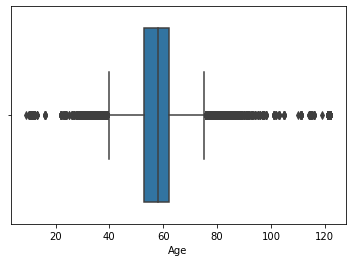

In [24]:
sns.boxplot(x="Age",data=df)

### Penjelasan
Untuk mencari nilai ekstrim pada atribut Age dan pada atribut ini terdapat nilai ekstrim yaitu 120 keatas

## Grafik Jumlah Salutation

<AxesSubplot:xlabel='salutation', ylabel='count'>

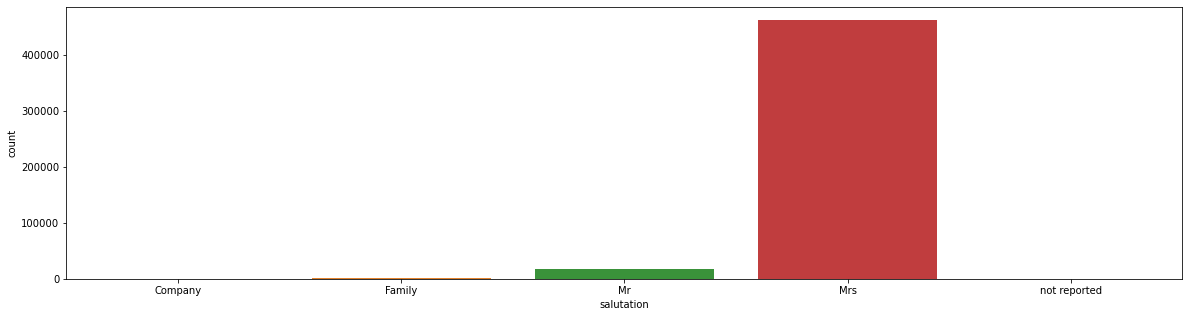

In [25]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, x="salutation", data=df)

### Penjelasan
Untuk melihat jumlah salutation disetiap kategorinya

## Grafik Jumlah Ukuran

<AxesSubplot:xlabel='size', ylabel='count'>

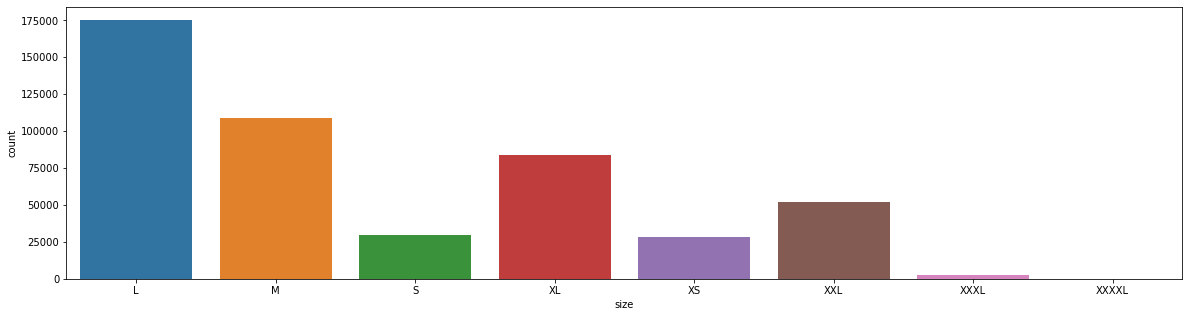

In [26]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, x="size", data=df)

### Penjelasan 
Untuk melihat jumlah ukuran baju disetiap ukurannya

## Grafik Hubungan Banyaknya Minat Ukuran Baju Terhadap Salutation

<AxesSubplot:xlabel='size', ylabel='count'>

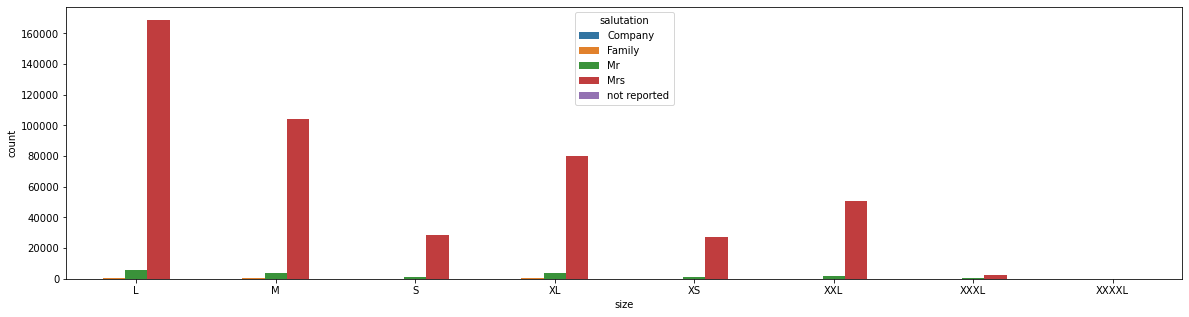

In [27]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, x="size",hue='salutation', data=df)

### Penjelasan
Untuk melihat banyaknya minat ukuran baju terhadap customer atau nama panggilan tersebut yang mana nama panggilan mrs mendominasi pada ukuran baju selain xxxl dan xxxxl

## Grafik Outlier Harga

<AxesSubplot:xlabel='price'>

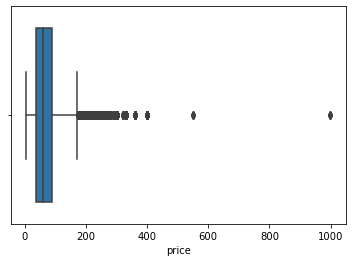

In [28]:
sns.boxplot(x="price",data=df)

### Penjelasan
untuk mencari nilai ekstrim dari sebuah atribut yaitu atribut harga dan menurut kelompok kami terdapat nilai ekstrim

## Grafik Ukuran

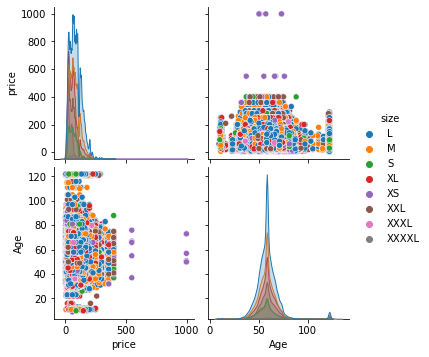

In [29]:
sns.pairplot(data=df[['price','Age','size']],hue="size")

### Penjelasan
ukuran L merupakan ukuran yang paling mendominasi diberbagai usia dengan harga yang beragam

## Grafik Salutation disetiap Kota

<AxesSubplot:xlabel='count', ylabel='state'>

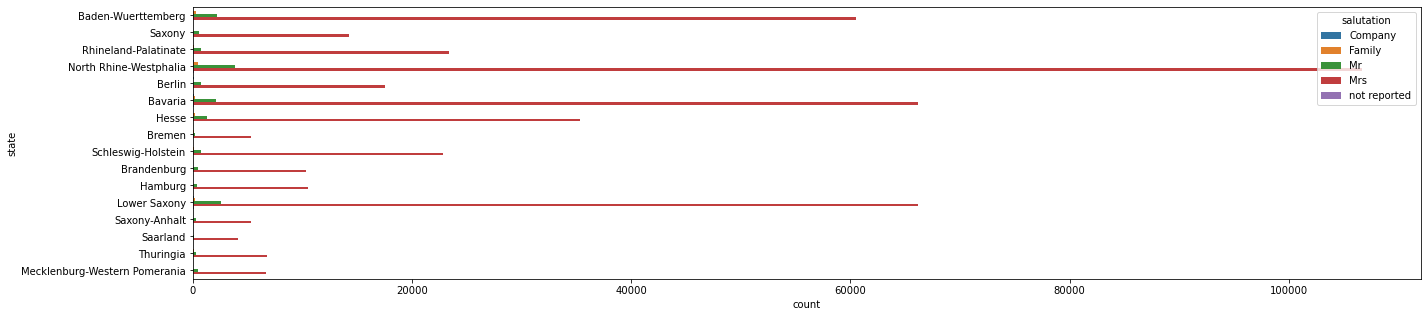

In [30]:
fig, ax = plt.subplots(figsize=(22, 5)) #atur ukuran chart
sns.countplot(ax=ax, y="state", hue='salutation', data=df)

### Penjelasan
Bahwa salutation yang mendominasi pada setiap kotanya kembali diduduki oleh mrs yang mana terlihat persebaran jumlah datanya sangat tinggi

# PEMBUATAN MODEL

In [31]:
df_tr = df

#### Mengambil tanggal, bulan, dan tahun pada delivery, order, creation, pembuatan dan kelahiran

In [32]:
df_tr['Bulan_Order'] = df_tr['orderDate'].dt.strftime('%m')
df_tr['Bulan_Order'] = pd.to_numeric(df_tr['Bulan_Order'], errors = 'coerce').convert_dtypes()
df_tr['Bulan_Creation'] = df_tr['creationDate'].dt.strftime('%m')
df_tr['Bulan_Creation'] = pd.to_numeric(df_tr['Bulan_Creation'], errors = 'coerce').convert_dtypes()
df_tr['Bulan_Kelahiran'] = df_tr['Tanggal_Kelahiran'].dt.strftime('%m')
df_tr['Bulan_Kelahiran'] = pd.to_numeric(df_tr['Bulan_Kelahiran'], errors = 'coerce').convert_dtypes()
df_tr['Bulan_Delivery'] = df_tr['deliveryDate'].dt.strftime('%m')
df_tr['Bulan_Delivery'] = pd.to_numeric(df_tr['Bulan_Delivery'], errors = 'coerce').convert_dtypes()

In [33]:
df_tr['Tahun_Pembuatan'] = df_tr['creationDate'].dt.strftime('%Y')
df_tr['Tahun_Pembuatan'] = pd.to_numeric(df_tr['Tahun_Pembuatan'], errors = 'coerce').convert_dtypes()
df_tr['Tahun_Order'] = df_tr['orderDate'].dt.strftime('%Y')
df_tr['Tahun_Order'] = pd.to_numeric(df_tr['Tahun_Order'], errors = 'coerce').convert_dtypes()
df_tr['Tahun_Kelahiran'] = df_tr['Tanggal_Kelahiran'].dt.strftime('%Y')
df_tr['Tahun_Kelahiran'] = pd.to_numeric(df_tr['Tahun_Kelahiran'], errors = 'coerce').convert_dtypes()
df_tr['Tahun_Delivery'] = df_tr['deliveryDate'].dt.strftime('%Y')
df_tr['Tahun_Delivery'] = pd.to_numeric(df_tr['Tahun_Delivery'], errors = 'coerce').convert_dtypes()

In [34]:
df_tr['Tanggal_Delivery'] = df_tr['deliveryDate'].dt.strftime('%d')
df_tr['Tanggal_Delivery'] = pd.to_numeric(df_tr['Tanggal_Delivery'], errors = 'coerce').convert_dtypes()
df_tr['Tanggal_Order'] = df_tr['orderDate'].dt.strftime('%d')
df_tr['Tanggal_Order'] = pd.to_numeric(df_tr['Tanggal_Order'], errors = 'coerce').convert_dtypes()
df_tr['Tanggal_Creation'] = df_tr['creationDate'].dt.strftime('%d')
df_tr['Tanggal_Creation'] = pd.to_numeric(df_tr['Tanggal_Creation'], errors = 'coerce').convert_dtypes()
df_tr['Tanggal_Kelahiran'] = df_tr['Tanggal_Kelahiran'].dt.strftime('%d')
df_tr['Tanggal_Kelahiran'] = pd.to_numeric(df_tr['Tanggal_Kelahiran'], errors = 'coerce').convert_dtypes()

#### Mencari nilai selisih antara order dan delivery

In [35]:
df_tr['days'] = df_tr['Tanggal_Delivery'] - df_tr['Tanggal_Order']
df_tr['days'] = pd.to_numeric(df_tr['days'], errors = 'coerce').convert_dtypes()

#### Mengisi data di kolom tanggal kelahiran menggunakan rata-rata

In [36]:
b = int(df_tr['Tanggal_Kelahiran'].mean())
df_tr["Tanggal_Kelahiran"] = df_tr['Tanggal_Kelahiran'].fillna(b,inplace=False)

#### Mengisi data di kolom hari menggunakan modus

In [37]:
df_tr["days"] = df_tr['days'].fillna(df_tr['days'].mode()[0],inplace=False)

#### Mengisi data di kolom tanggal delivery menggunakan median

In [38]:
df_tr["Tanggal_Delivery"] = df_tr['Tanggal_Delivery'].fillna(df_tr['Tanggal_Delivery'].median(),inplace=False)

#### Mengisi data di kolom bulan dan tahum kelahiran, delivery mneggunakan modus dan median

In [39]:
df_tr["Bulan_Kelahiran"] = df_tr['Bulan_Kelahiran'].fillna(df_tr['Bulan_Kelahiran'].mode()[0],inplace=False)
df_tr["Bulan_Delivery"] = df_tr['Bulan_Delivery'].fillna(df_tr['Bulan_Delivery'].mode()[0],inplace=False)
df_tr["Tahun_Kelahiran"] = df_tr['Tahun_Kelahiran'].fillna(df_tr['Tahun_Kelahiran'].median(),inplace=False)
df_tr["Tahun_Delivery"] = df_tr['Tahun_Delivery'].fillna(df_tr['Tahun_Delivery'].median(),inplace=False)

#### Melihat jumlah data pada kolom tahum delivery yang bernilai 1990

In [40]:
len(df_tr[df_tr.Tahun_Delivery == 1990])

4660

#### Melihat data yang unique pada kolom days

In [41]:
df_tr['days'].unique()

<IntegerArray>
[  2,  29,   1,   8,   7,   3,  15,   9,  18,  22,  14,   0,  12,  24,   4,
  11,  28,  26,  13,  25,  10,  21,  20,  23,  16,  19,   5,  17,  -2,   6,
  27,  -1,  30,  -3,  -4,  -5,  -6,  -8,  -7,  -9, -10, -11, -12, -13, -15,
 -14, -16, -17, -18, -19, -20, -22, -23, -21, -24, -25, -26, -27, -29, -28,
 -30]
Length: 61, dtype: Int64

#### Mengubah tanggal delivery yang lebih kecil dari tanggal order agar tidak minus

In [42]:
for i in range(len(df_tr)) :
    if (df_tr['Tanggal_Delivery'][i] < df_tr['Tanggal_Order'][i]) :
        df_tr['days'][i] = ((df_tr['Tanggal_Delivery'][i] + 30) - df_tr['Tanggal_Order'][i])
    else :
        df_tr['days'][i] = df_tr['Tanggal_Delivery'][i] - df_tr['Tanggal_Order'][i]
df_tr['days'] = pd.to_numeric(df_tr['days'], errors = 'coerce').convert_dtypes()

#### Melihat data yang unique pada kolom tahun delivery

In [43]:
df_tr['Tahun_Delivery'].unique()

<IntegerArray>
[2012, 1990, 2013]
Length: 3, dtype: Int64

#### Mengganti nilai 1990 pada kolom tahun delivery menggunakan modus

In [44]:
df_tr['Tahun_Delivery'] = df_tr['Tahun_Delivery'].replace(1990, df_tr['Tahun_Delivery'].mode()[0])

#### Melihat nilai null 

In [45]:
df_tr.isna().sum()

orderItemID              0
orderDate                0
deliveryDate         39419
itemID                   0
size                     0
color                    0
manufacturerID           0
price                    0
customerID               0
salutation               0
Age                      0
state                    0
creationDate             0
returnShipment           0
Tanggal_Kelahiran        0
Bulan_Order              0
Bulan_Creation           0
Bulan_Kelahiran          0
Bulan_Delivery           0
Tahun_Pembuatan          0
Tahun_Order              0
Tahun_Kelahiran          0
Tahun_Delivery           0
Tanggal_Delivery         0
Tanggal_Order            0
Tanggal_Creation         0
days                     0
dtype: int64

#### Mencari persentasi pengembalian terhadap tiap wilayah

In [46]:
data1 = df_tr.loc[df_tr['state'] == "North Rhine-Westphalia", 'returnShipment'].value_counts()
data2 = df_tr.loc[df_tr['state'] == "Lower Saxony", 'returnShipment'].value_counts()
data3 = df_tr.loc[df_tr['state'] == "Bavaria", 'returnShipment'].value_counts()
data4 = df_tr.loc[df_tr['state'] == "Baden-Wuerttemberg", 'returnShipment'].value_counts()
data5 = df_tr.loc[df_tr['state'] == "Hesse", 'returnShipment'].value_counts()
data6 = df_tr.loc[df_tr['state'] == "Rhineland-Palatinate", 'returnShipment'].value_counts()
data7 = df_tr.loc[df_tr['state'] == "Schleswig-Holstein", 'returnShipment'].value_counts()
data8 = df_tr.loc[df_tr['state'] == "Berlin", 'returnShipment'].value_counts()
data9 = df_tr.loc[df_tr['state'] == "Saxony", 'returnShipment'].value_counts()
data10 = df_tr.loc[df_tr['state'] == "Hamburg", 'returnShipment'].value_counts()
data11 = df_tr.loc[df_tr['state'] == "Brandenburg", 'returnShipment'].value_counts()
data12 = df_tr.loc[df_tr['state'] == "Thuringia", 'returnShipment'].value_counts()
data13 = df_tr.loc[df_tr['state'] == "Mecklenburg-Western Pomerania", 'returnShipment'].value_counts()
data14 = df_tr.loc[df_tr['state'] == "Saxony-Anhalt", 'returnShipment'].value_counts()
data15 = df_tr.loc[df_tr['state'] == "Bremen", 'returnShipment'].value_counts()
data16 = df_tr.loc[df_tr['state'] == "Saarland", 'returnShipment'].value_counts()

persen1 = int(((data1[1] / (data1[0] + data1[1])) * 100))
persen2 = int(((data2[1] / (data2[0] + data2[1])) * 100))
persen3 = int(((data3[1] / (data3[0] + data3[1])) * 100))
persen4 = int(((data4[1] / (data4[0] + data4[1])) * 100))
persen5 = int(((data5[1] / (data5[0] + data5[1])) * 100))
persen6 = int(((data6[1] / (data6[0] + data6[1])) * 100))
persen7 = int(((data7[1] / (data7[0] + data7[1])) * 100))
persen8 = int(((data8[1] / (data8[0] + data8[1])) * 100))
persen9 = int(((data9[1] / (data9[0] + data9[1])) * 100))
persen10 = int(((data10[1] / (data10[0] + data10[1])) * 100))
persen11 = int(((data11[1] / (data11[0] + data11[1])) * 100))
persen12 = int(((data12[1] / (data12[0] + data12[1])) * 100))
persen13 = int(((data13[1] / (data13[0] + data13[1])) * 100))
persen14 = int(((data14[1] / (data14[0] + data14[1])) * 100))
persen15 = int(((data15[1] / (data15[0] + data15[1])) * 100))
persen16 = int(((data16[1] / (data16[0] + data16[1])) * 100))

df_tr['perc_state'] = df_tr['Tanggal_Order']
for i in range(len(df_tr)) :
    if (df_tr['state'][i] == "North Rhine-Westphalia") : 
        df_tr['perc_state'][i] = persen1
    elif(df_tr['state'][i] == "Lower Saxony"):
        df_tr['perc_state'][i] = persen2
    elif(df_tr['state'][i] == "Bavaria"):
        df_tr['perc_state'][i] = persen3
    elif(df_tr['state'][i] == "Baden-Wuerttemberg"):
        df_tr['perc_state'][i] = persen4
    elif(df_tr['state'][i] == "Hesse"):
        df_tr['perc_state'][i] = persen5
    elif(df_tr['state'][i] == "Rhineland-Palatinate"):
        df_tr['perc_state'][i] = persen6
    elif(df_tr['state'][i] == "Schleswig-Holstein"):
        df_tr['perc_state'][i] = persen7
    elif(df_tr['state'][i] == "Berlin"):
        df_tr['perc_state'][i] = persen8
    elif(df_tr['state'][i] == "Saxony"):
        df_tr['perc_state'][i] = persen9
    elif(df_tr['state'][i] == "Hamburg"):
        df_tr['perc_state'][i] = persen10
    elif(df_tr['state'][i] == "Brandenburg"):
        df_tr['perc_state'][i] = persen11
    elif(df_tr['state'][i] == "Thuringia"):
        df_tr['perc_state'][i] = persen12
    elif(df_tr['state'][i] == "Mecklenburg-Western Pomerania"):
        df_tr['perc_state'][i] = persen13
    elif(df_tr['state'][i] == "Saxony-Anhalt"):
        df_tr['perc_state'][i] = persen14
    elif(df_tr['state'][i] == "Bremen"):
        df_tr['perc_state'][i] = persen15
    elif(df_tr['state'][i] == "Saarland"):
        df_tr['perc_state'][i] = persen16

In [47]:
df.head(5)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,...,Bulan_Delivery,Tahun_Pembuatan,Tahun_Order,Tahun_Kelahiran,Tahun_Delivery,Tanggal_Delivery,Tanggal_Order,Tanggal_Creation,days,perc_state
0,1,2012-04-01,2012-04-03,186,M,blue,25,69.90,794,Mrs,...,4,2011,2012,1965,2012,3,1,25,2,48
1,2,2012-04-01,2012-04-03,71,M,orange,21,69.95,794,Mrs,...,4,2011,2012,1965,2012,3,1,25,2,48
2,3,2012-04-01,2012-04-03,71,M,yellow,21,69.95,794,Mrs,...,4,2011,2012,1965,2012,3,1,25,2,48
3,4,2012-04-02,NaT,22,M,green,14,39.90,808,Mrs,...,1,2012,2012,1959,2012,16,2,4,14,50
4,5,2012-04-02,1990-12-31,151,L,black,53,29.90,825,Mrs,...,12,2011,2012,1964,2012,31,2,16,29,48


#### Mencari persentasi warna terhadap tiap wilayah

In [48]:
datas1 = df_tr.loc[df_tr['state'] == "North Rhine-Westphalia", 'color'].value_counts()
datas2 = df_tr.loc[df_tr['state'] == "Lower Saxony", 'color'].value_counts()
datas3 = df_tr.loc[df_tr['state'] == "Bavaria", 'color'].value_counts()
datas4 = df_tr.loc[df_tr['state'] == "Baden-Wuerttemberg", 'color'].value_counts()
datas5 = df_tr.loc[df_tr['state'] == "Hesse", 'color'].value_counts()
datas6 = df_tr.loc[df_tr['state'] == "Rhineland-Palatinate", 'color'].value_counts()
datas7 = df_tr.loc[df_tr['state'] == "Schleswig-Holstein", 'color'].value_counts()
datas8 = df_tr.loc[df_tr['state'] == "Berlin", 'color'].value_counts()
datas9 = df_tr.loc[df_tr['state'] == "Saxony", 'color'].value_counts()
datas10 = df_tr.loc[df_tr['state'] == "Hamburg", 'color'].value_counts()
datas11 = df_tr.loc[df_tr['state'] == "Brandenburg", 'color'].value_counts()
datas12 = df_tr.loc[df_tr['state'] == "Thuringia", 'color'].value_counts()
datas13 = df_tr.loc[df_tr['state'] == "Mecklenburg-Western Pomerania", 'color'].value_counts()
datas14 = df_tr.loc[df_tr['state'] == "Saxony-Anhalt", 'color'].value_counts()
datas15 = df_tr.loc[df_tr['state'] == "Bremen", 'color'].value_counts()
datas16 = df_tr.loc[df_tr['state'] == "Saarland", 'color'].value_counts()

persen_cs1 = int(((datas1[0] / (datas1.sum())) * 100))
persen_cs2 = int(((datas2[0] / (datas2.sum())) * 100))
persen_cs3 = int(((datas3[0] / (datas3.sum())) * 100))
persen_cs4 = int(((datas4[0] / (datas4.sum())) * 100))
persen_cs5 = int(((datas5[0] / (datas5.sum())) * 100))
persen_cs6 = int(((datas6[0] / (datas6.sum())) * 100))
persen_cs7 = int(((datas7[0] / (datas7.sum())) * 100))
persen_cs8 = int(((datas8[0] / (datas8.sum())) * 100))
persen_cs9 = int(((datas9[0] / (datas9.sum())) * 100))
persen_cs10 = int(((datas10[0] / (datas10.sum())) * 100))
persen_cs11 = int(((datas11[0] / (datas11.sum())) * 100))
persen_cs12 = int(((datas12[0] / (datas12.sum())) * 100))
persen_cs13 = int(((datas13[0] / (datas13.sum())) * 100))
persen_cs14 = int(((datas14[0] / (datas14.sum())) * 100))
persen_cs15 = int(((datas15[0] / (datas15.sum())) * 100))
persen_cs16 = int(((datas16[0] / (datas16.sum())) * 100))

df_tr['perc_cs'] = df_tr['Tanggal_Order']
for i in range(len(df_tr)) :
    if (df_tr['state'][i] == "North Rhine-Westphalia") : 
        df_tr['perc_cs'][i] = persen_cs1
    elif(df_tr['state'][i] == "Lower Saxony"):
        df_tr['perc_cs'][i] = persen_cs2
    elif(df_tr['state'][i] == "Bavaria"):
        df_tr['perc_cs'][i] = persen_cs3
    elif(df_tr['state'][i] == "Baden-Wuerttemberg"):
        df_tr['perc_cs'][i] = persen_cs4
    elif(df_tr['state'][i] == "Hesse"):
        df_tr['perc_cs'][i] = persen_cs5
    elif(df_tr['state'][i] == "Rhineland-Palatinate"):
        df_tr['perc_cs'][i] = persen_cs6
    elif(df_tr['state'][i] == "Schleswig-Holstein"):
        df_tr['perc_cs'][i] = persen_cs7
    elif(df_tr['state'][i] == "Berlin"):
        df_tr['perc_cs'][i] = persen_cs8
    elif(df_tr['state'][i] == "Saxony"):
        df_tr['perc_cs'][i] = persen_cs9
    elif(df_tr['state'][i] == "Hamburg"):
        df_tr['perc_cs'][i] = persen_cs10
    elif(df_tr['state'][i] == "Brandenburg"):
        df_tr['perc_cs'][i] = persen_cs11
    elif(df_tr['state'][i] == "Thuringia"):
        df_tr['perc_cs'][i] = persen_cs12
    elif(df_tr['state'][i] == "Mecklenburg-Western Pomerania"):
        df_tr['perc_cs'][i] = persen_cs13
    elif(df_tr['state'][i] == "Saxony-Anhalt"):
        df_tr['perc_cs'][i] = persen_cs14
    elif(df_tr['state'][i] == "Bremen"):
        df_tr['perc_cs'][i] = persen_cs15
    elif(df_tr['state'][i] == "Saarland"):
        df_tr['perc_cs'][i] = persen_cs16
df_tr['perc_cs'] = pd.to_numeric(df_tr['perc_cs'], errors = 'coerce').convert_dtypes()

#### Mencari persentasi size tiap wilayah

In [49]:
# Size State
datas1 = df_tr.loc[df_tr['state'] == "North Rhine-Westphalia", 'size'].value_counts()
datas2 = df_tr.loc[df_tr['state'] == "Lower Saxony", 'size'].value_counts()
datas3 = df_tr.loc[df_tr['state'] == "Bavaria", 'size'].value_counts()
datas4 = df_tr.loc[df_tr['state'] == "Baden-Wuerttemberg", 'size'].value_counts()
datas5 = df_tr.loc[df_tr['state'] == "Hesse", 'size'].value_counts()
datas6 = df_tr.loc[df_tr['state'] == "Rhineland-Palatinate", 'size'].value_counts()
datas7 = df_tr.loc[df_tr['state'] == "Schleswig-Holstein", 'size'].value_counts()
datas8 = df_tr.loc[df_tr['state'] == "Berlin", 'size'].value_counts()
datas9 = df_tr.loc[df_tr['state'] == "Saxony", 'size'].value_counts()
datas10 = df_tr.loc[df_tr['state'] == "Hamburg", 'size'].value_counts()
datas11 = df_tr.loc[df_tr['state'] == "Brandenburg", 'size'].value_counts()
datas12 = df_tr.loc[df_tr['state'] == "Thuringia", 'size'].value_counts()
datas13 = df_tr.loc[df_tr['state'] == "Mecklenburg-Western Pomerania", 'size'].value_counts()
datas14 = df_tr.loc[df_tr['state'] == "Saxony-Anhalt", 'size'].value_counts()
datas15 = df_tr.loc[df_tr['state'] == "Bremen", 'size'].value_counts()

persen_cs1 = int(((datas1[0] / (datas1.sum())) * 100))
persen_cs2 = int(((datas2[0] / (datas2.sum())) * 100))
persen_cs3 = int(((datas3[0] / (datas3.sum())) * 100))
persen_cs4 = int(((datas4[0] / (datas4.sum())) * 100))
persen_cs5 = int(((datas5[0] / (datas5.sum())) * 100))
persen_cs6 = int(((datas6[0] / (datas6.sum())) * 100))
persen_cs7 = int(((datas7[0] / (datas7.sum())) * 100))
persen_cs8 = int(((datas8[0] / (datas8.sum())) * 100))
persen_cs9 = int(((datas9[0] / (datas9.sum())) * 100))
persen_cs10 = int(((datas10[0] / (datas10.sum())) * 100))
persen_cs11 = int(((datas11[0] / (datas11.sum())) * 100))
persen_cs12 = int(((datas12[0] / (datas12.sum())) * 100))
persen_cs13 = int(((datas13[0] / (datas13.sum())) * 100))
persen_cs14 = int(((datas14[0] / (datas14.sum())) * 100))
persen_cs15 = int(((datas15[0] / (datas15.sum())) * 100))
persen_cs16 = int(((datas16[0] / (datas16.sum())) * 100))

df_tr['perc_sizsta'] = df_tr['Tanggal_Order']
for i in range(len(df_tr)) :
    if (df_tr['state'][i] == "North Rhine-Westphalia") : 
        df_tr['perc_sizsta'][i] = persen_cs1
    elif(df_tr['state'][i] == "Lower Saxony"):
        df_tr['perc_sizsta'][i] = persen_cs2
    elif(df_tr['state'][i] == "Bavaria"):
        df_tr['perc_sizsta'][i] = persen_cs3
    elif(df_tr['state'][i] == "Baden-Wuerttemberg"):
        df_tr['perc_sizsta'][i] = persen_cs4
    elif(df_tr['state'][i] == "Hesse"):
        df_tr['perc_sizsta'][i] = persen_cs5
    elif(df_tr['state'][i] == "Rhineland-Palatinate"):
        df_tr['perc_sizsta'][i] = persen_cs6
    elif(df_tr['state'][i] == "Schleswig-Holstein"):
        df_tr['perc_sizsta'][i] = persen_cs7
    elif(df_tr['state'][i] == "Berlin"):
        df_tr['perc_sizsta'][i] = persen_cs8
    elif(df_tr['state'][i] == "Saxony"):
        df_tr['perc_sizsta'][i] = persen_cs9
    elif(df_tr['state'][i] == "Hamburg"):
        df_tr['perc_sizsta'][i] = persen_cs10
    elif(df_tr['state'][i] == "Brandenburg"):
        df_tr['perc_sizsta'][i] = persen_cs11
    elif(df_tr['state'][i] == "Thuringia"):
        df_tr['perc_sizsta'][i] = persen_cs12
    elif(df_tr['state'][i] == "Mecklenburg-Western Pomerania"):
        df_tr['perc_sizsta'][i] = persen_cs13
    elif(df_tr['state'][i] == "Saxony-Anhalt"):
        df_tr['perc_sizsta'][i] = persen_cs14
    elif(df_tr['state'][i] == "Bremen"):
        df_tr['perc_sizsta'][i] = persen_cs15
    elif(df_tr['state'][i] == "Saarland"):
        df_tr['perc_sizsta'][i] = persen_cs16


#### Melihat data persentase size 

In [50]:
df_tr[["state", "perc_sizsta"]]

,state,perc_sizsta
0,Baden-Wuerttemberg,36
1,Baden-Wuerttemberg,36
2,Baden-Wuerttemberg,36
3,Saxony,34
4,Rhineland-Palatinate,36
...,...,...
481087,Lower Saxony,36
481088,Berlin,34
481089,Berlin,34
481090,Berlin,34


#### Melihat data yang unque pada kolom persen size

In [51]:
df_tr['perc_sizsta'].unique()

<IntegerArray>
[36, 34, 35, 37, 19]
Length: 5, dtype: Int64

#### Melihat data yang unique pada kolom salutation

In [52]:
df_tr['salutation'].unique()

['Mrs', 'Mr', 'Family', 'not reported', 'Company']
Categories (5, object): ['Company', 'Family', 'Mr', 'Mrs', 'not reported']

#### Mencari persentase size tiap salutation

In [53]:
datasizage1 = df_tr.loc[df_tr['salutation'] == "Mrs", 'size'].value_counts()
datasizage2 = df_tr.loc[df_tr['salutation'] == "Mr", 'size'].value_counts()
datasizage3 = df_tr.loc[df_tr['salutation'] == "Family", 'size'].value_counts()
datasizage4 = df_tr.loc[df_tr['salutation'] == "Company", 'size'].value_counts()
datasizage5 = df_tr.loc[df_tr['salutation'] == "not reported", 'size'].value_counts()

persen_salsiz1 = int(((datasizage1[0] / (datasizage1.sum())) * 100))
persen_salsiz2 = int(((datasizage2[0] / (datasizage2.sum())) * 100))
persen_salsiz3 = int(((datasizage3[0] / (datasizage3.sum())) * 100))
persen_salsiz4 = int(((datasizage4[0] / (datasizage4.sum())) * 100))
persen_salsiz5 = int(((datasizage5[0] / (datasizage5.sum())) * 100))

df_tr['perc_salsize'] = df_tr['Tanggal_Order']
for i in range(len(df_tr)) :
    if (df_tr['salutation'][i] == "Mrs") : 
        df_tr['perc_salsize'][i] = persen_salsiz1
    elif(df_tr['salutation'][i] == "Mr"):
        df_tr['perc_salsize'][i] = persen_salsiz2
    elif(df_tr['salutation'][i] == "Family"):
        df_tr['perc_salsize'][i] = persen_salsiz3
    elif(df_tr['salutation'][i] == "Company"):
        df_tr['perc_salsize'][i] = persen_salsiz4
    elif(df_tr['salutation'][i] == "not reported"):
        df_tr['perc_salsize'][i] = persen_salsiz5

#### Melihat data persentase size tiap salutation

In [54]:
df_tr[["salutation", "perc_salsize"]]

,salutation,perc_salsize
0,Mrs,36
1,Mrs,36
2,Mrs,36
3,Mrs,36
4,Mrs,36
...,...,...
481087,Mr,32
481088,Mrs,36
481089,Mr,32
481090,Mr,32


#### Melihat data yang unique di kolom persen salutation

In [55]:
df_tr['perc_salsize'].unique()

<IntegerArray>
[36, 32, 39, 38]
Length: 4, dtype: Int64

#### Melihat 5 data teratas 

In [56]:
df_tr.head(5)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,...,Tahun_Kelahiran,Tahun_Delivery,Tanggal_Delivery,Tanggal_Order,Tanggal_Creation,days,perc_state,perc_cs,perc_sizsta,perc_salsize
0,1,2012-04-01,2012-04-03,186,M,blue,25,69.90,794,Mrs,...,1965,2012,3,1,25,2,48,18,36,36
1,2,2012-04-01,2012-04-03,71,M,orange,21,69.95,794,Mrs,...,1965,2012,3,1,25,2,48,18,36,36
2,3,2012-04-01,2012-04-03,71,M,yellow,21,69.95,794,Mrs,...,1965,2012,3,1,25,2,48,18,36,36
3,4,2012-04-02,NaT,22,M,green,14,39.90,808,Mrs,...,1959,2012,16,2,4,14,50,17,34,36
4,5,2012-04-02,1990-12-31,151,L,black,53,29.90,825,Mrs,...,1964,2012,31,2,16,29,48,18,36,36


#### Mencari persentase size tiap warna

In [57]:
datasc1 = df_tr.loc[df_tr['size'] == "XS", 'color'].value_counts()
datasc2 = df_tr.loc[df_tr['size'] == "S", 'color'].value_counts()
datasc3 = df_tr.loc[df_tr['size'] == "M", 'color'].value_counts()
datasc4 = df_tr.loc[df_tr['size'] == "L", 'color'].value_counts()
datasc5 = df_tr.loc[df_tr['size'] == "XL", 'color'].value_counts()
datasc6 = df_tr.loc[df_tr['size'] == "XXL", 'color'].value_counts()
datasc7 = df_tr.loc[df_tr['size'] == "XXXL", 'color'].value_counts()
datasc8 = df_tr.loc[df_tr['size'] == "XXXXL", 'color'].value_counts()

persen_colsiz1 = int(((datasc1[0] / (datasc1.sum())) * 100))
persen_colsiz2 = int(((datasc2[0] / (datasc2.sum())) * 100))
persen_colsiz3 = int(((datasc3[0] / (datasc3.sum())) * 100))
persen_colsiz4 = int(((datasc4[0] / (datasc4.sum())) * 100))
persen_colsiz5 = int(((datasc5[0] / (datasc5.sum())) * 100))
persen_colsiz6 = int(((datasc6[0] / (datasc6.sum())) * 100))
persen_colsiz7 = int(((datasc7[0] / (datasc7.sum())) * 100))
persen_colsiz8 = int(((datasc8[0] / (datasc8.sum())) * 100))

df_tr['perc_colsiz'] = df_tr['Tanggal_Order']
for i in range(len(df_tr)) :
    if (df_tr['size'][i] == "XS") : 
        df_tr['perc_colsiz'][i] = persen_colsiz1
    elif(df_tr['size'][i] == "S"):
        df_tr['perc_colsiz'][i] = persen_colsiz2
    elif(df_tr['size'][i] == "M"):
        df_tr['perc_colsiz'][i] = persen_colsiz3
    elif(df_tr['size'][i] == "L"):
        df_tr['perc_colsiz'][i] = persen_colsiz4
    elif(df_tr['size'][i] == "XL"):
        df_tr['perc_colsiz'][i] = persen_colsiz5
    elif(df_tr['size'][i] == "XXL"):
        df_tr['perc_colsiz'][i] = persen_colsiz6
    elif(df_tr['size'][i] == "XXXL"):
        df_tr['perc_colsiz'][i] = persen_colsiz7
    elif(df_tr['size'][i] == "XXXXL"):
        df_tr['perc_colsiz'][i] = persen_colsiz8

#### Mencari persentase state tiap salutation

In [58]:
# Size State
datastsal1 = df_tr.loc[df_tr['state'] == "North Rhine-Westphalia", 'salutation'].value_counts()
datastsal2 = df_tr.loc[df_tr['state'] == "Lower Saxony", 'salutation'].value_counts()
datastsal3 = df_tr.loc[df_tr['state'] == "Bavaria", 'salutation'].value_counts()
datastsal4 = df_tr.loc[df_tr['state'] == "Baden-Wuerttemberg", 'salutation'].value_counts()
datastsal5 = df_tr.loc[df_tr['state'] == "Hesse", 'salutation'].value_counts()
datastsal6 = df_tr.loc[df_tr['state'] == "Rhineland-Palatinate", 'salutation'].value_counts()
datastsal7 = df_tr.loc[df_tr['state'] == "Schleswig-Holstein", 'salutation'].value_counts()
datastsal8 = df_tr.loc[df_tr['state'] == "Berlin", 'salutation'].value_counts()
datastsal9 = df_tr.loc[df_tr['state'] == "Saxony", 'salutation'].value_counts()
datastsal10 = df_tr.loc[df_tr['state'] == "Hamburg", 'salutation'].value_counts()
datastsal11 = df_tr.loc[df_tr['state'] == "Brandenburg", 'salutation'].value_counts()
datastsal12 = df_tr.loc[df_tr['state'] == "Thuringia", 'salutation'].value_counts()
datastsal13 = df_tr.loc[df_tr['state'] == "Mecklenburg-Western Pomerania", 'salutation'].value_counts()
datastsal14 = df_tr.loc[df_tr['state'] == "Saxony-Anhalt", 'salutation'].value_counts()
datastsal15 = df_tr.loc[df_tr['state'] == "Bremen", 'salutation'].value_counts()
datastsal16 = df_tr.loc[df_tr['state'] == "Saarland", 'salutation'].value_counts()

persen_stsal1 = int(((datastsal1[0] / (datastsal1.sum())) * 100))
persen_stsal2 = int(((datastsal2[0] / (datastsal2.sum())) * 100))
persen_stsal3 = int(((datastsal3[0] / (datastsal3.sum())) * 100))
persen_stsal4 = int(((datastsal4[0] / (datastsal4.sum())) * 100))
persen_stsal5 = int(((datastsal5[0] / (datastsal5.sum())) * 100))
persen_stsal6 = int(((datastsal6[0] / (datastsal6.sum())) * 100))
persen_stsal7 = int(((datastsal7[0] / (datastsal7.sum())) * 100))
persen_stsal8 = int(((datastsal8[0] / (datastsal8.sum())) * 100))
persen_stsal9 = int(((datastsal9[0] / (datastsal9.sum())) * 100))
persen_stsal10 = int(((datastsal10[0] / (datastsal10.sum())) * 100))
persen_stsal11 = int(((datastsal11[0] / (datastsal11.sum())) * 100))
persen_stsal12 = int(((datastsal12[0] / (datastsal12.sum())) * 100))
persen_stsal13 = int(((datastsal13[0] / (datastsal13.sum())) * 100))
persen_stsal14 = int(((datastsal14[0] / (datastsal14.sum())) * 100))
persen_stsal15 = int(((datastsal15[0] / (datastsal15.sum())) * 100))
persen_stsal16 = int(((datastsal16[0] / (datastsal16.sum())) * 100))

df_tr['perc_stsal'] = df_tr['Tanggal_Order']
for i in range(len(df_tr)) :
    if (df_tr['state'][i] == "North Rhine-Westphalia") : 
        df_tr['perc_stsal'][i] = persen_stsal1
    elif(df_tr['state'][i] == "Lower Saxony"):
        df_tr['perc_stsal'][i] = persen_stsal2
    elif(df_tr['state'][i] == "Bavaria"):
        df_tr['perc_stsal'][i] = persen_stsal3
    elif(df_tr['state'][i] == "Baden-Wuerttemberg"):
        df_tr['perc_stsal'][i] = persen_stsal4
    elif(df_tr['state'][i] == "Hesse"):
        df_tr['perc_stsal'][i] = persen_stsal5
    elif(df_tr['state'][i] == "Rhineland-Palatinate"):
        df_tr['perc_stsal'][i] = persen_stsal6
    elif(df_tr['state'][i] == "Schleswig-Holstein"):
        df_tr['perc_stsal'][i] = persen_stsal7
    elif(df_tr['state'][i] == "Berlin"):
        df_tr['perc_stsal'][i] = persen_stsal8
    elif(df_tr['state'][i] == "Saxony"):
        df_tr['perc_stsal'][i] = persen_stsal9
    elif(df_tr['state'][i] == "Hamburg"):
        df_tr['perc_stsal'][i] = persen_stsal10
    elif(df_tr['state'][i] == "Brandenburg"):
        df_tr['perc_stsal'][i] = persen_stsal11
    elif(df_tr['state'][i] == "Thuringia"):
        df_tr['perc_stsal'][i] = persen_stsal12
    elif(df_tr['state'][i] == "Mecklenburg-Western Pomerania"):
        df_tr['perc_stsal'][i] = persen_stsal13
    elif(df_tr['state'][i] == "Saxony-Anhalt"):
        df_tr['perc_stsal'][i] = persen_stsal14
    elif(df_tr['state'][i] == "Bremen"):
        df_tr['perc_stsal'][i] = persen_stsal15
    elif(df_tr['state'][i] == "Saarland"):
        df_tr['perc_stsal'][i] = persen_stsal16

#### Melihat data yang unique pada kolom persen state

In [59]:
df_tr['perc_stsal'].unique()

<IntegerArray>
[95, 96, 97, 93]
Length: 4, dtype: Int64

#### Melihat data yang ada di kolom persen state

In [60]:
df_tr[["state", "perc_stsal"]]

,state,perc_stsal
0,Baden-Wuerttemberg,95
1,Baden-Wuerttemberg,95
2,Baden-Wuerttemberg,95
3,Saxony,96
4,Rhineland-Palatinate,96
...,...,...
481087,Lower Saxony,95
481088,Berlin,95
481089,Berlin,95
481090,Berlin,95


#### Mencari persentase salutation terhadap returnshipment

In [61]:
datasalrs1 = df_tr.loc[df_tr['salutation'] == "Mrs", 'returnShipment'].value_counts()
datasalrs2 = df_tr.loc[df_tr['salutation'] == "Mr", 'returnShipment'].value_counts()
datasalrs3 = df_tr.loc[df_tr['salutation'] == "Family", 'returnShipment'].value_counts()
datasalrs4 = df_tr.loc[df_tr['salutation'] == "Company", 'returnShipment'].value_counts()
datasalrs5 = df_tr.loc[df_tr['salutation'] == "not reported", 'returnShipment'].value_counts()

persen_salrs1 = int(((datasalrs1[1] / (datasalrs1.sum())) * 100))
persen_salrs2 = int(((datasalrs2[1] / (datasalrs2.sum())) * 100))
persen_salrs3 = int(((datasalrs3[1] / (datasalrs3.sum())) * 100))
persen_salrs4 = int(((datasalrs4[1] / (datasalrs4.sum())) * 100))
persen_salrs5 = int(((datasalrs5[1] / (datasalrs5.sum())) * 100))

df_tr['perc_salrs'] = df_tr['Tanggal_Order']
for i in range(len(df_tr)) :
    if (df_tr['salutation'][i] == "Mrs") : 
        df_tr['perc_salrs'][i] = persen_salrs1
    elif(df_tr['salutation'][i] == "Mr"):
        df_tr['perc_salrs'][i] = persen_salrs2
    elif(df_tr['salutation'][i] == "Family"):
        df_tr['perc_salrs'][i] = persen_salrs3
    elif(df_tr['salutation'][i] == "Company"):
        df_tr['perc_salrs'][i] = persen_salrs4
    elif(df_tr['salutation'][i] == "not reported"):
        df_tr['perc_salrs'][i] = persen_salrs5

#### Mencari persentase dari itemID ke returnshipment dengan value TRUE 

In [62]:
for i in df_tr['itemID'].unique():
  df_tr.loc[(df_tr['itemID'] == i), "perc_Item_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['itemID'] == i)]) / len(df_tr[df_tr['itemID'] == i])
df_tr["perc_Item_rS"] = df_tr["perc_Item_rS"] * 100

#### Mencari persentase dari cotumerID ke returnshipment dengan value TRUE

In [63]:
for i in df_tr['customerID'].unique():
  df_tr.loc[(df_tr['customerID'] == i), "perc_Customer_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['customerID'] == i)]) / len(df_tr[df_tr['customerID'] == i])
df_tr["perc_Customer_rS"] = df_tr["perc_Customer_rS"] * 100

#### Mencari persentase dari Age ke returnshipment dengan value TRUE

In [64]:
for i in df_tr['Age'].unique():
  df_tr.loc[(df_tr['Age'] == i), "perc_Age_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['Age'] == i)]) / len(df_tr[df_tr['Age'] == i])
df_tr["perc_Age_rS"] = df_tr["perc_Age_rS"] * 100

#### Mencari persentase dari size ke returnshipment denga value TRUE

In [65]:
for i in df_tr['size'].unique():
  df_tr.loc[(df_tr['size'] == i), "perc_Size_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['size'] == i)]) / len(df_tr[df_tr['size'] == i])
df_tr["perc_Size_rS"] = df_tr["perc_Size_rS"] * 100

#### Mencari persentase dari manufacturerID ke returnshipment dengan value TRUE

In [66]:
for i in df_tr['manufacturerID'].unique():
  df_tr.loc[(df_tr['manufacturerID'] == i), "perc_Man_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['manufacturerID'] == i)]) / len(df_tr[df_tr['manufacturerID'] == i])
df_tr["perc_Man_rS"] = df_tr["perc_Man_rS"] * 100

#### Mencari persentase dari price ke returnshipment dengan value TRUE

In [67]:
for i in df_tr['price'].unique():
  df_tr.loc[(df_tr['price'] == i), "perc_Price_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['price'] == i)]) / len(df_tr[df_tr['price'] == i])
df_tr["perc_Price_rS"] = df_tr["perc_Price_rS"] * 100

#### Mencari persentase dari color ke returnshipment dengan value TRUE

In [68]:
for i in df_tr['color'].unique():
  df_tr.loc[(df_tr['color'] == i), "perc_Col_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['color'] == i)]) / len(df_tr[df_tr['color'] == i])
df_tr["perc_Col_rS"] = df_tr["perc_Col_rS"] * 100

#### Mencari persentase dari salutation ke color

In [69]:
temp = df_tr['color'].mode()[0]
for i in df_tr['salutation'].unique():
  df_tr.loc[(df_tr['salutation'] == i), "perc_Sal_col"] = len(df_tr[(df_tr['color'] == temp) & (df_tr['salutation'] == i)]) / len(df_tr[df_tr['salutation'] == i])
df_tr["perc_Sal_col"] = df_tr["perc_Sal_col"] * 100

#### Mencari persentase dari bulan delivery ke returnshipment dengan value TRUE

In [70]:
for i in df_tr['Bulan_Delivery'].unique():
  df_tr.loc[(df_tr['Bulan_Delivery'] == i), "perc_MonthDev_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['Bulan_Delivery'] == i)]) / len(df_tr[df_tr['Bulan_Delivery'] == i])
df_tr["perc_MonthDev_rS"] = df_tr["perc_MonthDev_rS"] * 100

#### Mencari persentase dari tahun delivery ke returnshipment dengan value TRUE

In [71]:
for i in df_tr['Tahun_Delivery'].unique():
  df_tr.loc[(df_tr['Tahun_Delivery'] == i), "perc_YearDev_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['Tahun_Delivery'] == i)]) / len(df_tr[df_tr['Tahun_Delivery'] == i])
df_tr["perc_YearDev_rS"] = df_tr["perc_YearDev_rS"] * 100

#### Mencari persentase dari tahun kelahiran ke returnshipment dengan value TRUE

In [72]:
for i in df_tr['Tahun_Kelahiran'].unique():
  df_tr.loc[(df_tr['Tahun_Kelahiran'] == i), "perc_YearBorn_rS"] = len(df_tr[(df_tr['returnShipment'] == 1) & (df_tr['Tahun_Kelahiran'] == i)]) / len(df_tr[df_tr['Tahun_Kelahiran'] == i])
df_tr["perc_YearBorn_rS"] = df_tr["perc_YearBorn_rS"] * 100

In [73]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   orderItemID        481092 non-null  int64         
 1   orderDate          481092 non-null  datetime64[ns]
 2   deliveryDate       441673 non-null  datetime64[ns]
 3   itemID             481092 non-null  int64         
 4   size               481092 non-null  category      
 5   color              481092 non-null  category      
 6   manufacturerID     481092 non-null  int64         
 7   price              481092 non-null  float64       
 8   customerID         481092 non-null  int64         
 9   salutation         481092 non-null  category      
 10  Age                481092 non-null  Int64         
 11  state              481092 non-null  object        
 12  creationDate       481092 non-null  datetime64[ns]
 13  returnShipment     481092 non-null  int64   

In [74]:
df_tr.isna().sum()

orderItemID              0
orderDate                0
deliveryDate         39419
itemID                   0
size                     0
color                    0
manufacturerID           0
price                    0
customerID               0
salutation               0
Age                      0
state                    0
creationDate             0
returnShipment           0
Tanggal_Kelahiran        0
Bulan_Order              0
Bulan_Creation           0
Bulan_Kelahiran          0
Bulan_Delivery           0
Tahun_Pembuatan          0
Tahun_Order              0
Tahun_Kelahiran          0
Tahun_Delivery           0
Tanggal_Delivery         0
Tanggal_Order            0
Tanggal_Creation         0
days                     0
perc_state               0
perc_cs                  0
perc_sizsta              0
perc_salsize             0
perc_colsiz              0
perc_stsal               0
perc_salrs               0
perc_Item_rS             0
perc_Customer_rS         0
perc_Age_rS              0
p

In [75]:
#Penghapusan beberapa column yang tidak diperlukan dalam pembuatan model
df_train = df_tr.drop(['deliveryDate', 'creationDate' ,'orderDate','color'],axis=1)

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   orderItemID        481092 non-null  int64   
 1   itemID             481092 non-null  int64   
 2   size               481092 non-null  category
 3   manufacturerID     481092 non-null  int64   
 4   price              481092 non-null  float64 
 5   customerID         481092 non-null  int64   
 6   salutation         481092 non-null  category
 7   Age                481092 non-null  Int64   
 8   state              481092 non-null  object  
 9   returnShipment     481092 non-null  int64   
 10  Tanggal_Kelahiran  481092 non-null  Int64   
 11  Bulan_Order        481092 non-null  Int64   
 12  Bulan_Creation     481092 non-null  Int64   
 13  Bulan_Kelahiran    481092 non-null  Int64   
 14  Bulan_Delivery     481092 non-null  Int64   
 15  Tahun_Pembuatan    481092 non-null

In [77]:
#Pembuatan Once Hot Encoding
df_train = pd.get_dummies(data=df_train, columns=['state','size', 'days','Bulan_Order', 'salutation', 'Tanggal_Kelahiran', 'Tanggal_Order', 'Tanggal_Delivery', 'manufacturerID'])

In [78]:
# Penentuan target
le = preprocessing.LabelEncoder()
le.fit(df_train.returnShipment)
Y = le.transform(df_train.returnShipment)

In [79]:
df_train.returnShipment.value_counts()

0    249001
1    232091
Name: returnShipment, dtype: int64

In [80]:
# Karena sudah disimpan ke variabel le, maka returnShipment bisa dihapus
X = df_train.drop("returnShipment",axis=1)

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Columns: 361 entries, orderItemID to manufacturerID_166
dtypes: Int64(16), float64(12), int64(3), uint8(330)
memory usage: 272.5 MB


In [115]:
df_test = pd.read_csv("C:\\Users\\raisy\\Downloads\\data_return_try\\Csv\\orders_class.csv")
df_merj = pd.merge(X, df_test, on = 'customerID', how="left")

In [ ]:
X.to_csv('C:\\Users\\raisy\\Downloads\\data_return_try\\datatest.csv', index = False)

In [116]:
df_merj.to_csv('C:\\Users\\raisy\\Downloads\\data_return_try\\datatest_merge_2.csv', index = False)

In [82]:
# Split dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [83]:
# Pembuatan pickle
with open('C:\\Users\\raisy\\Downloads\\data_return_try\\data.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

In [84]:
# Mengubah nilai menjadi 0 sampai 1
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)

In [85]:
# ss_scaler = preprocessing.StandardScaler()
# X_train_ss = ss_scaler.fit_transform(X_train) #fit hanya di train
# X_test_ss = ss_scaler.transform(X_test)
# pca = PCA(.75)
# X_train_pca = pca.fit_transform(X_train_ss)
# X_test_pca = pca.transform(X_test_ss)

In [86]:
# Modeling
clf = RandomForestClassifier(n_estimators=200, random_state=123, max_depth=20)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.7701701327180702
              precision    recall  f1-score   support

           0       0.81      0.72      0.76     49723
           1       0.73      0.82      0.78     46496

    accuracy                           0.77     96219
   macro avg       0.77      0.77      0.77     96219
weighted avg       0.77      0.77      0.77     96219



In [87]:
clf4 = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = "mlogloss", max_depth = 20, gamma=0, subsample = 0.8,learning_rate=0.1, n_estimators = 100, nthread=4)
# num_class adalah jumlah kelas
clf4.fit(X_train, Y_train)
Y_pred = clf4.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.7572724721728556
              precision    recall  f1-score   support

           0       0.79      0.73      0.76     49723
           1       0.73      0.79      0.76     46496

    accuracy                           0.76     96219
   macro avg       0.76      0.76      0.76     96219
weighted avg       0.76      0.76      0.76     96219



In [88]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances.head(30))


                     importance
perc_Customer_rS       0.372076
perc_Item_rS           0.071459
Tanggal_Delivery_16    0.063961
Bulan_Delivery         0.045665
perc_MonthDev_rS       0.042600
perc_Price_rS          0.025143
orderItemID            0.022322
price                  0.022166
perc_Man_rS            0.021061
perc_YearDev_rS        0.017281
Tahun_Delivery         0.014302
customerID             0.014187
itemID                 0.013873
perc_Size_rS           0.009357
perc_Age_rS            0.009245
perc_YearBorn_rS       0.009045
Age                    0.008941
Tahun_Kelahiran        0.008771
Tanggal_Creation       0.008173
perc_Col_rS            0.007455
Bulan_Kelahiran        0.006835
Bulan_Creation         0.006409
size_XS                0.004145
Bulan_Order_1          0.004038
manufacturerID_3       0.004029
perc_colsiz            0.003899
Tahun_Order            0.003637
perc_state             0.003445
Tahun_Pembuatan        0.003241
days_3                 0.002643


In [89]:
# Mengeksport modeling yang akan dipakai
joblib.dump(clf, "C:\\Users\\raisy\\Downloads\\data_return_try\\classification.joblib")

['C:\\Users\\raisy\\Downloads\\data_return_try\\classification.joblib']

In [117]:
# Data Class
df_class = pd.read_csv("C:\\Users\\raisy\\Downloads\\data_return_try\\Csv\\orders_class.csv")

In [118]:
df_class.loc[(df_class.price == 0), "price"]=np.nan
df_class["price"] = df_class['price'].fillna(df_class['price'].median(),inplace=False)

In [119]:
len(df_class[df_class.price == 0])

0

In [120]:
len(df_class[df_class.color == '?'])

0

In [121]:
df_class.color=df_class.color.str.replace('?',df_class['color'].mode()[0], regex=True)

In [122]:
df_class['color'] = df_class['color'].replace("denim", "blue")
df_class['color'] = df_class['color'].replace("ocher", "orange")
df_class['color'] = df_class['color'].replace("curry", "yellow")
df_class['color'] = df_class['color'].replace("green", "green")
df_class['color'] = df_class['color'].replace("black", "black")
df_class['color'] = df_class['color'].replace("brown", "brown")
df_class['color'] = df_class['color'].replace("red", "red")
df_class['color'] = df_class['color'].replace("mocca", "brown")
df_class['color'] = df_class['color'].replace("anthracite", "grey")
df_class['color'] = df_class['color'].replace("olive", "green")
df_class['color'] = df_class['color'].replace("petrol", "blue")
df_class['color'] = df_class['color'].replace("blue", "blue")
df_class['color'] = df_class['color'].replace("grey", "grey")
df_class['color'] = df_class['color'].replace("beige", "cream")
df_class['color'] = df_class['color'].replace("ecru", "brown")
df_class['color'] = df_class['color'].replace("turquoise", "green")
df_class['color'] = df_class['color'].replace("magenta", "red")
df_class['color'] = df_class['color'].replace("purple", "purple")
df_class['color'] = df_class['color'].replace("pink", "pink")
df_class['color'] = df_class['color'].replace("khaki", "cream")
df_class['color'] = df_class['color'].replace("navy", "blue")
df_class['color'] = df_class['color'].replace("habana", "brown")
df_class['color'] = df_class['color'].replace("silver", "grey")
df_class['color'] = df_class['color'].replace("navy", "blue")
df_class['color'] = df_class['color'].replace("white", "white")
df_class['color'] = df_class['color'].replace("nature", "green")
df_class['color'] = df_class['color'].replace("stained", "brown")
df_class['color'] = df_class['color'].replace("orange", "orange")
df_class['color'] = df_class['color'].replace("azure", "blue")
df_class['color'] = df_class['color'].replace("apricot", "orange")
df_class['color'] = df_class['color'].replace("mango", "yellow")
df_class['color'] = df_class['color'].replace("berry", "red")
df_class['color'] = df_class['color'].replace("ash", "grey")
df_class['color'] = df_class['color'].replace("hibiscus", "pink")
df_class['color'] = df_class['color'].replace("fuchsia", "purple")
df_class['color'] = df_class['color'].replace("blau", "blue")
df_class['color'] = df_class['color'].replace("dark denim", "blue")
df_class['color'] = df_class['color'].replace("mint", "green")
df_class['color'] = df_class['color'].replace("ivory", "brown")
df_class['color'] = df_class['color'].replace("yellow", "yellow")
df_class['color'] = df_class['color'].replace("bordeaux", "red")
df_class['color'] = df_class['color'].replace("pallid", "green")
df_class['color'] = df_class['color'].replace("ancient", "blue")
df_class['color'] = df_class['color'].replace("baltic blue", "blue")
df_class['color'] = df_class['color'].replace("almond", "brown")
df_class['color'] = df_class['color'].replace("aquamarine", "green")
df_class['color'] = df_class['color'].replace("brwon", "brown")
df_class['color'] = df_class['color'].replace("aubergine", "purple")
df_class['color'] = df_class['color'].replace("aqua", "blue")
df_class['color'] = df_class['color'].replace("dark garnet", "red")
df_class['color'] = df_class['color'].replace("dark grey", "grey")
df_class['color'] = df_class['color'].replace("avocado", "green")
df_class['color'] = df_class['color'].replace("cream", "cream")
df_class['color'] = df_class['color'].replace("champagner", "cream")
df_class['color'] = df_class['color'].replace("cortina mocca", "brown")
df_class['color'] = df_class['color'].replace("currant purple", "purple")
df_class['color'] = df_class['color'].replace("cognac", "orange")
df_class['color'] = df_class['color'].replace("aviator", "grey")
df_class['color'] = df_class['color'].replace("gold", "yellow")
df_class['color'] = df_class['color'].replace("ebony", "green")
df_class['color'] = df_class['color'].replace("cobalt blue", "blue")
df_class['color'] = df_class['color'].replace("kanel", "cream")
df_class['color'] = df_class['color'].replace("curled", "brown")
df_class['color'] = df_class['color'].replace("caramel", "orange")
df_class['color'] = df_class['color'].replace("antique pink", "pink")
df_class['color'] = df_class['color'].replace("darkblue", "blue")
df_class['color'] = df_class['color'].replace("copper coin", "brown")
df_class['color'] = df_class['color'].replace("terracotta", "orange")
df_class['color'] = df_class['color'].replace("basalt", "grey")
df_class['color'] = df_class['color'].replace("amethyst", "purple")
df_class['color'] = df_class['color'].replace("coral", "orange")
df_class['color'] = df_class['color'].replace("jade", "green")
df_class['color'] = df_class['color'].replace("opal", "green")
df_class['color'] = df_class['color'].replace("striped", "white")
df_class['color'] = df_class['color'].replace("mahagoni", "brown")
df_class['color'] = df_class['color'].replace("floral", "orange")
df_class['color'] = df_class['color'].replace("dark navy", "blue")
df_class['color'] = df_class['color'].replace("dark oliv", "blue")
df_class['color'] = df_class['color'].replace("vanille", "white")
df_class['color'] = df_class['color'].replace("ingwer", "yellow")
df_class['color'] = df_class['color'].replace("iron", "grey")
df_class['color'] = df_class['color'].replace("graphite", "grey")
df_class['color'] = df_class['color'].replace("leopard", "orange")
df_class['color'] = df_class['color'].replace("oliv", "orange")
df_class['color'] = df_class['color'].replace("bronze", "brown")
df_class['color'] = df_class['color'].replace("crimson", "red")
df_class['color'] = df_class['color'].replace("lemon", "yellow")
df_class['color'] = df_class['color'].replace("perlmutt", "cream")

In [123]:
# mengubah huruf dan angka anomali pada size menjadi angka sesuai dengan ketentuan ukuran Europe
df_class['size'] = df_class['size'].replace("xs", "30")
df_class['size'] = df_class['size'].replace("XS", "30")
df_class['size'] = df_class['size'].replace("s", "34")
df_class['size'] = df_class['size'].replace("S", "34")
df_class['size'] = df_class['size'].replace("m", "38")
df_class['size'] = df_class['size'].replace("M", "38")
df_class['size'] = df_class['size'].replace("l", "42")
df_class['size'] = df_class['size'].replace("L", "42")
df_class['size'] = df_class['size'].replace("xl", "46")
df_class['size'] = df_class['size'].replace("XL", "46")
df_class['size'] = df_class['size'].replace("xxl", "48")
df_class['size'] = df_class['size'].replace("XXL", "48")
df_class['size'] = df_class['size'].replace("xxxl", "52")
df_class['size'] = df_class['size'].replace("XXXL", "52")
df_class['size'] = df_class['size'].replace("unsized", np.nan)
df_class['size'] = df_class['size'].replace("2+", "3")
df_class['size'] = df_class['size'].replace("3+", "4")
df_class['size'] = df_class['size'].replace("4+", "5")
df_class['size'] = df_class['size'].replace("5+", "6")
df_class['size'] = df_class['size'].replace("6+", "7")
df_class['size'] = df_class['size'].replace("7+", "8")
df_class['size'] = df_class['size'].replace("8+", "9")
df_class['size'] = df_class['size'].replace("9+", "10")
df_class['size'] = df_class['size'].replace("10+", "11")
df_class['size'] = df_class['size'].replace("11+", "12")
df_class['size'] = df_class['size'].replace("12+", "13")
df_class['size'] = df_class['size'].replace("13+", "14")
df_class['size'] = df_class['size'].replace("37+", "38")
df_class['size'] = df_class['size'].replace("38+", "39")
df_class['size'] = df_class['size'].replace("39+", "40")
df_class['size'] = df_class['size'].replace("40+", "41")
df_class['size'] = df_class['size'].replace("41+", "42")
df_class['size'] = df_class['size'].replace("43+", "44")
df_class['size'] = df_class['size'].replace("44+", "45")
df_class['size'] = df_class['size'].replace("45+", "46")
df_class['size'] = df_class['size'].replace("46+", "47")

# menjadikan format size menjadi integer 
df_class['size'] = pd.to_numeric(df_class['size'], errors = 'coerce').convert_dtypes()

# mengubah angka anomali menjadi angka size ukuran global (europe)
df_class['size'] = df_class['size'].mask(df_class['size']<=2, 30) #XS
df_class['size'] = df_class['size'].mask(df_class['size']<=6, 34) #S
df_class['size'] = df_class['size'].mask(df_class['size']<=10, 38)#M 
df_class['size'] = df_class['size'].mask(df_class['size']<=14, 42)#L
df_class['size'] = df_class['size'].mask(df_class['size']<=18, 46)#XL
df_class['size'] = df_class['size'].mask(df_class['size']<=22, 48)#XXL
df_class['size'] = df_class['size'].mask(df_class['size']<=26, 52)#XXXL

# mengubah nilai range data menjadi angka size ukuran global Europe
df_class.loc[df_class['size'].between(27, 29), 'size'] = 30
df_class.loc[df_class['size'].between(31, 33), 'size'] = 34
df_class.loc[df_class['size'].between(35, 37), 'size'] = 38
df_class.loc[df_class['size'].between(39, 41), 'size'] = 42
df_class.loc[df_class['size'].between(43, 45), 'size'] = 46
df_class['size'] = df_class['size'].replace(47, 48)
df_class.loc[df_class['size'].between(49, 51), 'size'] = 52
df_class.loc[df_class['size'].between(53, 55), 'size'] = 56
df_class.loc[df_class['size'].between(57, 59), 'size'] = 60

# mengubah nilai range data anomali atau ekstrim menggunakan data mean, median dan value global
df_class.loc[df_class['size'].between(61, 1000), 'size'] = int(df_class['size'].mean())
df_class.loc[df_class['size'].between(1001, 5000), 'size'] = df_class['size'].median()
df_class.loc[df_class['size'].between(43, 45), 'size'] = 46

# untuk mengisi nilai null pada size dengan nilai median
df_class["size"] = df_class['size'].fillna(df_class['size'].median(),inplace=False)

# mengubah tipe data size menjadi string
df_class['size'] = df_class['size'].astype(str)

# mengubah value global menjadi ukuran baju (str)
df_class['size'] = df_class['size'].replace("30", "XS")
df_class['size'] = df_class['size'].replace("34", "S")
df_class['size'] = df_class['size'].replace("38", "M")
df_class['size'] = df_class['size'].replace("42", "L")
df_class['size'] = df_class['size'].replace("46", "XL")
df_class['size'] = df_class['size'].replace("48", "XXL")
df_class['size'] = df_class['size'].replace("52", "XXXL")
df_class['size'] = df_class['size'].replace("56", "XXXXL")
df_class['size'] = df_class['size'].replace("60", "XXXXL")


In [124]:
df_class['size'] = df_class['size'].astype('category')
df_class['color'] = df_class['color'].astype('category')
df_class['salutation'] = df_class['salutation'].astype('category')
# mengubah tipe data creationDate menjadi tipe data Datetime
df_class['creationDate'] = pd.to_datetime(df_class['creationDate'], errors='coerce')
df_class['creationDate'] = pd.to_datetime(df_class['creationDate'], unit='s')

In [125]:
df_class['Tanggal_Kelahiran'] = df_class['dateOfBirth']

In [126]:
now = pd.Timestamp('now')
df_class['dateOfBirth'] = pd.to_datetime(df_class['dateOfBirth'], errors='coerce')
df_class['Tanggal_Kelahiran'] = pd.to_datetime(df_class['Tanggal_Kelahiran'], errors='coerce')
df_class['dateOfBirth'] = (now - df_class['dateOfBirth']).astype('<m8[Y]')
df_class['dateOfBirth'] = pd.to_numeric(df_class['dateOfBirth'], errors = 'coerce').convert_dtypes()

In [127]:
df_class.rename(columns={'dateOfBirth':'Age'},inplace=True)

In [129]:
df_class['deliveryDate'] = pd.to_datetime(df_class['deliveryDate'], errors='coerce')
df_class['orderDate'] = pd.to_datetime(df_class['orderDate'], errors='coerce')
df_class['deliveryDate'] = pd.to_datetime(df_class['deliveryDate'], unit='s')
df_class['orderDate'] = pd.to_datetime(df_class['orderDate'], unit='s')

In [128]:
df_class['Age'] = pd.to_numeric(df_class['Age'], errors = 'coerce').convert_dtypes()

In [130]:
a = int(df_class['Age'].mean())
df_class["Age"] = df_class['Age'].fillna(a,inplace=False)

In [131]:
df_class['Bulan_Order'] = df_class['orderDate'].dt.strftime('%m')
df_class['Bulan_Order'] = pd.to_numeric(df_class['Bulan_Order'], errors = 'coerce').convert_dtypes()
df_class['Bulan_Creation'] = df_class['creationDate'].dt.strftime('%m')
df_class['Bulan_Creation'] = pd.to_numeric(df_class['Bulan_Creation'], errors = 'coerce').convert_dtypes()
df_class['Bulan_Kelahiran'] = df_class['Tanggal_Kelahiran'].dt.strftime('%m')
df_class['Bulan_Kelahiran'] = pd.to_numeric(df_class['Bulan_Kelahiran'], errors = 'coerce').convert_dtypes()
df_class['Bulan_Delivery'] = df_class['deliveryDate'].dt.strftime('%m')
df_class['Bulan_Delivery'] = pd.to_numeric(df_class['Bulan_Delivery'], errors = 'coerce').convert_dtypes()

In [132]:
df_class['Tahun_Pembuatan'] = df_class['creationDate'].dt.strftime('%Y')
df_class['Tahun_Pembuatan'] = pd.to_numeric(df_class['Tahun_Pembuatan'], errors = 'coerce').convert_dtypes()
df_class['Tahun_Order'] = df_class['orderDate'].dt.strftime('%Y')
df_class['Tahun_Order'] = pd.to_numeric(df_class['Tahun_Order'], errors = 'coerce').convert_dtypes()
df_class['Tahun_Kelahiran'] = df_class['Tanggal_Kelahiran'].dt.strftime('%Y')
df_class['Tahun_Kelahiran'] = pd.to_numeric(df_class['Tahun_Kelahiran'], errors = 'coerce').convert_dtypes()
df_class['Tahun_Delivery'] = df_class['deliveryDate'].dt.strftime('%Y')
df_class['Tahun_Delivery'] = pd.to_numeric(df_class['Tahun_Delivery'], errors = 'coerce').convert_dtypes()

In [133]:
df_class['Tanggal_Delivery'] = df_class['deliveryDate'].dt.strftime('%d')
df_class['Tanggal_Delivery'] = pd.to_numeric(df_class['Tanggal_Delivery'], errors = 'coerce').convert_dtypes()
df_class['Tanggal_Order'] = df_class['orderDate'].dt.strftime('%d')
df_class['Tanggal_Order'] = pd.to_numeric(df_class['Tanggal_Order'], errors = 'coerce').convert_dtypes()
df_class['Tanggal_Creation'] = df_class['creationDate'].dt.strftime('%d')
df_class['Tanggal_Creation'] = pd.to_numeric(df_class['Tanggal_Creation'], errors = 'coerce').convert_dtypes()
df_class['Tanggal_Kelahiran'] = df_class['Tanggal_Kelahiran'].dt.strftime('%d')
df_class['Tanggal_Kelahiran'] = pd.to_numeric(df_class['Tanggal_Kelahiran'], errors = 'coerce').convert_dtypes()

In [134]:
df_class['days'] = df_class['Tanggal_Delivery'] - df_class['Tanggal_Order']
df_class['days'] = pd.to_numeric(df_class['days'], errors = 'coerce').convert_dtypes()

In [135]:
b = int(df_class['Tanggal_Kelahiran'].mean())
df_class["Tanggal_Kelahiran"] = df_class['Tanggal_Kelahiran'].fillna(b,inplace=False)

In [136]:
df_class["days"] = df_class['days'].fillna(df_class['days'].mode()[0],inplace=False)

In [137]:
df_class["Tanggal_Delivery"] = df_class['Tanggal_Delivery'].fillna(df_class['Tanggal_Delivery'].median(),inplace=False)

In [138]:
df_class["Bulan_Kelahiran"] = df_class['Bulan_Kelahiran'].fillna(df_class['Bulan_Kelahiran'].mode()[0],inplace=False)
df_class["Bulan_Delivery"] = df_class['Bulan_Delivery'].fillna(df_class['Bulan_Delivery'].mode()[0],inplace=False)
df_class["Tahun_Kelahiran"] = df_class['Tahun_Kelahiran'].fillna(df_class['Tahun_Kelahiran'].median(),inplace=False)
df_class["Tahun_Delivery"] = df_class['Tahun_Delivery'].fillna(df_class['Tahun_Delivery'].median(),inplace=False)

In [139]:
for i in range(len(df_class)) :
    if (df_class['Tanggal_Delivery'][i] < df_class['Tanggal_Order'][i]) :
        df_class['days'][i] = ((df_class['Tanggal_Delivery'][i] + 30) - df_class['Tanggal_Order'][i])
    else :
        df_class['days'][i] = df_class['Tanggal_Delivery'][i] - df_class['Tanggal_Order'][i]
df_class['days'] = pd.to_numeric(df_class['days'], errors = 'coerce').convert_dtypes()

In [140]:
df_class['Tahun_Delivery'] = df_class['Tahun_Delivery'].replace(1990, df_class['Tahun_Delivery'].mode()[0])

#### Proses pengcopyan data persen dari data train ke data class

In [141]:
for i in df_tr['state'].unique() :
    df_class.loc[(df_class['state'] == i), "perc_state"] = df_tr[(df_tr['state'] == i)]['perc_state'].values[0]

In [142]:
for i in df_tr['color'].unique() :
    df_class.loc[(df_class['color'] == i), "perc_cs"] = df_tr[(df_tr['color'] == i)]['perc_cs'].values[0]

In [143]:
for i in df_tr['size'].unique() :
    df_class.loc[(df_class['size'] == i), "perc_sizsta"] = df_tr[(df_tr['size'] == i)]['perc_sizsta'].values[0]

In [145]:
for i in df_tr['salutation'].unique() :
    df_class.loc[(df_class['salutation'] == i), "perc_salsize"] = df_tr[(df_tr['salutation'] == i)]['perc_salsize'].values[0]

In [146]:
for i in df_tr['color'].unique() :
    df_class.loc[(df_class['color'] == i), "perc_colsiz"] = df_tr[(df_tr['color'] == i)]['perc_colsiz'].values[0]

In [147]:
for i in df_tr['state'].unique() :
    df_class.loc[(df_class['state'] == i), "perc_stsal"] = df_tr[(df_tr['state'] == i)]['perc_stsal'].values[0]

In [148]:
for i in df_tr['salutation'].unique() :
    df_class.loc[(df_class['salutation'] == i), "perc_salrs"] = df_tr[(df_tr['salutation'] == i)]['perc_salrs'].values[0]

In [149]:
for i in df_tr['itemID'].unique() :
    df_class.loc[(df_class['itemID'] == i), "perc_Item_rS"] = df_tr[(df_tr['itemID'] == i)]['perc_Item_rS'].values[0]

In [150]:
for i in df_tr['customerID'].unique() :
    df_class.loc[(df_class['customerID'] == i), "perc_Customer_rS"] = df_tr[(df_tr['customerID'] == i)]['perc_Customer_rS'].values[0]

In [151]:
for i in df_tr['Age'].unique() :
    df_class.loc[(df_class['Age'] == i), "perc_Age_rS"] = df_tr[(df_tr['Age'] == i)]['perc_Age_rS'].values[0]

In [152]:
for i in df_tr['size'].unique() :
    df_class.loc[(df_class['size'] == i), "perc_Size_rS"] = df_tr[(df_tr['size'] == i)]['perc_Size_rS'].values[0]

In [154]:
for i in df_tr['manufacturerID'].unique() :
    df_class.loc[(df_class['manufacturerID'] == i), "perc_Man_rS"] = df_tr[(df_tr['manufacturerID'] == i)]['perc_Man_rS'].values[0]

In [155]:
for i in df_tr['price'].unique() :
    df_class.loc[(df_class['price'] == i), "perc_Price_rS"] = df_tr[(df_tr['price'] == i)]['perc_Price_rS'].values[0]

In [156]:
for i in df_tr['color'].unique() :
    df_class.loc[(df_class['color'] == i), "perc_Col_rS"] = df_tr[(df_tr['color'] == i)]['perc_Col_rS'].values[0]

In [157]:
for i in df_tr['salutation'].unique() :
    df_class.loc[(df_class['salutation'] == i), "perc_Sal_col"] = df_tr[(df_tr['salutation'] == i)]['perc_Sal_col'].values[0]

In [158]:
for i in df_tr['Bulan_Delivery'].unique() :
    df_class.loc[(df_class['Bulan_Delivery'] == i), "perc_MonthDev_rS"] = df_tr[(df_tr['Bulan_Delivery'] == i)]['perc_MonthDev_rS'].values[0]

In [159]:
for i in df_tr['Tahun_Delivery'].unique() :
    df_class.loc[(df_class['Tahun_Delivery'] == i), "perc_YearDev_rS"] = df_tr[(df_tr['Tahun_Delivery'] == i)]['perc_YearDev_rS'].values[0]

In [160]:
for i in df_tr['Tahun_Kelahiran'].unique() :
    df_class.loc[(df_class['Tahun_Kelahiran'] == i), "perc_YearBorn_rS"] = df_tr[(df_tr['Tahun_Kelahiran'] == i)]['perc_YearBorn_rS'].values[0]

In [161]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50078 entries, 0 to 50077
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   orderItemID        50078 non-null  int64         
 1   orderDate          50078 non-null  datetime64[ns]
 2   deliveryDate       45810 non-null  datetime64[ns]
 3   itemID             50078 non-null  int64         
 4   size               50078 non-null  category      
 5   color              50078 non-null  category      
 6   manufacturerID     50078 non-null  int64         
 7   price              50078 non-null  float64       
 8   customerID         50078 non-null  int64         
 9   salutation         50078 non-null  category      
 10  Age                50078 non-null  Int64         
 11  state              50078 non-null  object        
 12  creationDate       50078 non-null  datetime64[ns]
 13  Tanggal_Kelahiran  50078 non-null  Int64         
 14  Bulan_

In [162]:
# Penanganan Data kosong
df_class["perc_Customer_rS"] = df_class["perc_Customer_rS"].fillna(0,inplace=False)

In [164]:
# Penanganan Data kosong
df_class["perc_Item_rS"] = df_class["perc_Item_rS"].fillna(0,inplace=False)
df_class["perc_Price_rS"] = df_class["perc_Price_rS"].fillna(0,inplace=False)
df_class["perc_YearBorn_rS"] = df_class["perc_YearBorn_rS"].fillna(df_class["perc_YearBorn_rS"].mode()[0],inplace=False)

In [165]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50078 entries, 0 to 50077
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   orderItemID        50078 non-null  int64         
 1   orderDate          50078 non-null  datetime64[ns]
 2   deliveryDate       45810 non-null  datetime64[ns]
 3   itemID             50078 non-null  int64         
 4   size               50078 non-null  category      
 5   color              50078 non-null  category      
 6   manufacturerID     50078 non-null  int64         
 7   price              50078 non-null  float64       
 8   customerID         50078 non-null  int64         
 9   salutation         50078 non-null  category      
 10  Age                50078 non-null  Int64         
 11  state              50078 non-null  object        
 12  creationDate       50078 non-null  datetime64[ns]
 13  Tanggal_Kelahiran  50078 non-null  Int64         
 14  Bulan_

In [211]:
# Creeted df_train
# CreateDate, DelvDate, OrderDate, Color
df1_test = df_class.drop(['creationDate', 'deliveryDate', 'orderDate','color'],axis=1)

In [212]:
#Pembuatan Once Hot Encoding
# State,Size,Days,MontOrder,salu,DateBorn, DateDelivery, ManufID
df_test = pd.get_dummies(data=df1_test, columns=['state','size', 'days','Bulan_Order', 'salutation', 'Tanggal_Kelahiran', 'Tanggal_Order', 'Tanggal_Delivery', 'manufacturerID'])

In [214]:
df_test[['orderItemID', 'Bulan_Order_1', 'Bulan_Order_2', 'Bulan_Order_3', 'Bulan_Order_5', 'Bulan_Order_6', 'Bulan_Order_7', 'Bulan_Order_8', 'Bulan_Order_9', 'Bulan_Order_10', 'Bulan_Order_11', 'Bulan_Order_12', 'Tanggal_Order_31', 'Tanggal_Delivery_27', 'manufacturerID_52', 'manufacturerID_61', 'manufacturerID_62', 'manufacturerID_65', 'manufacturerID_67', 'manufacturerID_68', 'manufacturerID_76', 'manufacturerID_79', 'manufacturerID_80', 'manufacturerID_82', 'manufacturerID_83', 'manufacturerID_85', 'manufacturerID_86', 'manufacturerID_87', 'manufacturerID_91', 'manufacturerID_92', 'manufacturerID_93', 'manufacturerID_95', 'manufacturerID_96', 'manufacturerID_98', 'manufacturerID_103', 'manufacturerID_105', 'manufacturerID_106', 'manufacturerID_107', 'manufacturerID_108', 'manufacturerID_109', 'manufacturerID_110', 'manufacturerID_112', 'manufacturerID_114', 'manufacturerID_115', 'manufacturerID_121', 'manufacturerID_126', 'manufacturerID_130', 'manufacturerID_132', 'manufacturerID_133', 'manufacturerID_134', 'manufacturerID_136', 'manufacturerID_137', 'manufacturerID_138', 'manufacturerID_139', 'manufacturerID_140', 'manufacturerID_141', 'manufacturerID_143', 'manufacturerID_158', 'manufacturerID_159', 'manufacturerID_164']] = 0 

In [215]:
# Pickle
with open ('C:\\Users\\raisy\\Downloads\\data_return_try\\data.pickle', 'rb') as fp:
    X_train_column = list(pickle.load(fp))
    
df_prediksi2 = df_test[X_train_column]

In [216]:
clf = joblib.load("C:\\Users\\raisy\\Downloads\\data_return_try\\classification.joblib")
clf.predict(df_prediksi2)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [217]:
# Created data use enumerate
df_Answer = []
for i, j in enumerate(clf.predict(df_prediksi2)):
    df_Answer.append([i, j])

In [218]:
# Print out df(list)
df_Answer[0]

[0, 0]

In [219]:
# Created dataframe from list
df_hasil = pd.DataFrame(df_Answer)

In [220]:
# Show df hasil
df_hasil

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
50073,50073,0
50074,50074,0
50075,50075,1
50076,50076,0


In [221]:
# Add columns name
df_hasil.columns =['orderItemID', 'prediction']

In [222]:
# Show df_Hasil
df_hasil

,orderItemID,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
50073,50073,0
50074,50074,0
50075,50075,1
50076,50076,0


In [223]:
# Save to the txt file
np.savetxt(r'C:\\Users\\raisy\\Downloads\\data_return_try\\order_class.txt', df_hasil, fmt='%d', delimiter=';',header="orderItemID;prediction", comments='' )

In [224]:
# Read txt file to dataframe
df2 = pd.read_table("C:\\Users\\raisy\\Downloads\\data_return_try\\order_class.txt", delimiter=";", na_values = '?')

In [225]:
# Counts data true and false from prediction column
df2['prediction'].value_counts()

0    31231
1    18847
Name: prediction, dtype: int64